# Tarefa 1 LLM

In [ ]:
# --- CONFIGURAÇÃO INICIAL ---
# Importação das bibliotecas necessárias para todo o trabalho
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, gamma, ttest_1samp
import pandas as pd
from sklearn.datasets import load_iris # Dataset exemplo

# Configuração visual dos gráficos
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

**Parte 1 - A: Histogramas e Classificação**

**Contexto do Problema**: Nesta seção, analisamos a distribuição de frequências de features de um dataset para entender a separabilidade entre classes. O tamanho dos "bins" (intervalos) no histograma é crucial: bins muito largos podem ocultar detalhes importantes, enquanto bins muito estreitos podem criar ruído excessivo.

**Objetivo:** Gerar histogramas comparativos com diferentes tamanhos de bins e discutir o impacto na classificação usando aprendizado de máquina.

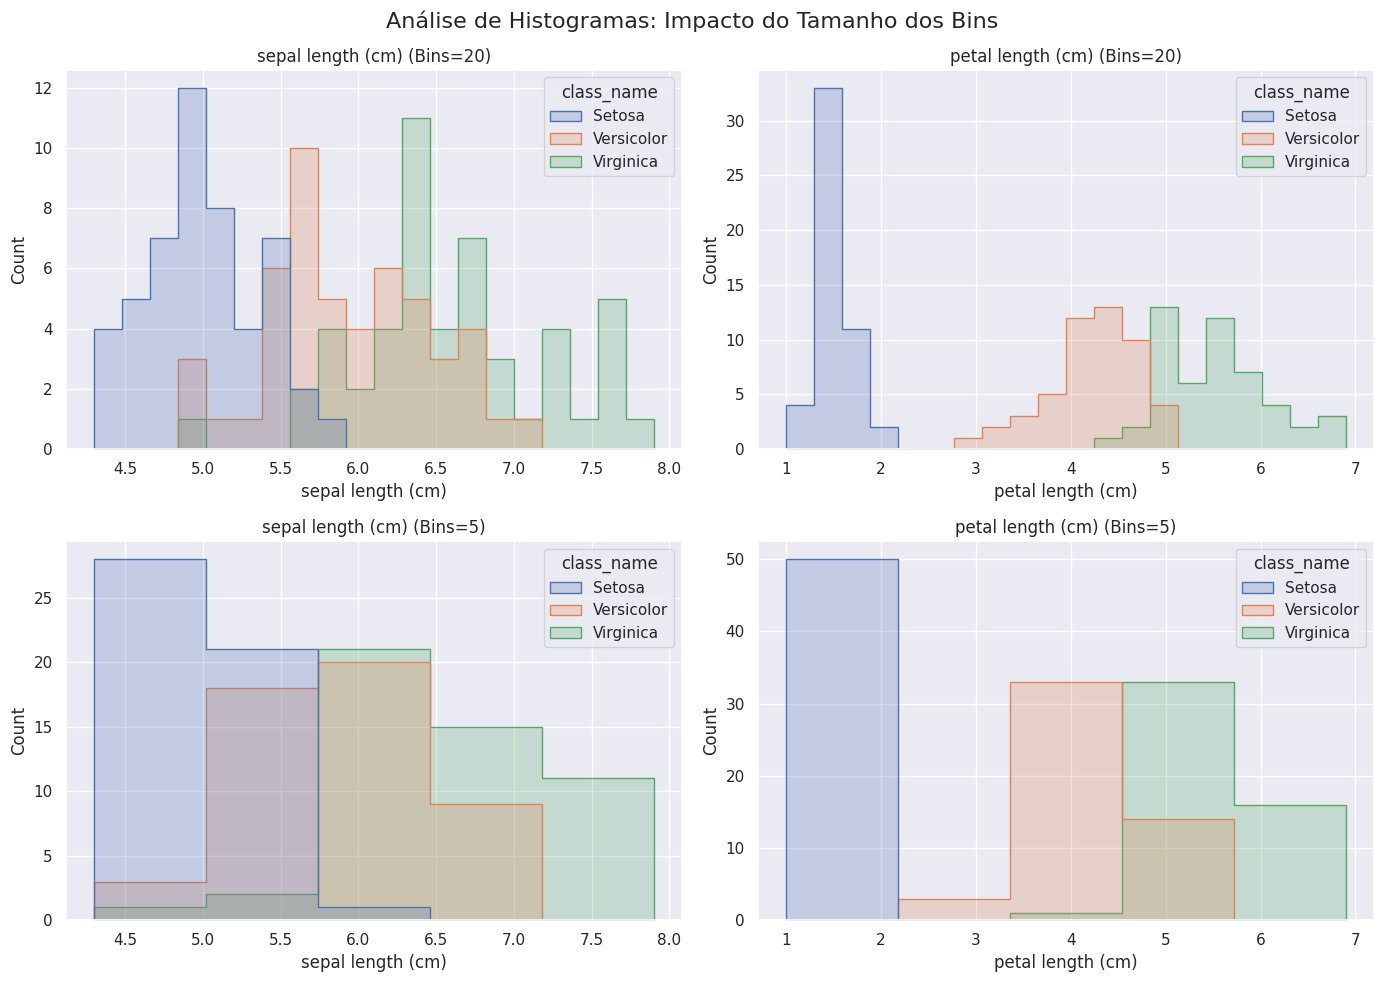


DISCUSSÃO:
1. Separação de Classes: A feature 'petal length' apresenta uma separação muito mais clara entre a classe Setosa e as demais, facilitando a classificação.
2. Tamanho dos Bins: Com 5 bins, perdemos a nuance da sobreposição entre Versicolor e Virginica. Com 20 bins, a distribuição fica mais ruidosa, mas revela melhor os picos locais.



In [ ]:
# --- PARTE 1 A ---

# 1. Carregamento do Dataset (Exemplo: Iris)
# NOTA: Se você tiver seu próprio dataset do Trabalho 1, carregue-o aqui.
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['class_name'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Selecionando duas features para análise
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'

# 2. Plotagem dos Histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análise de Histogramas: Impacto do Tamanho dos Bins', fontsize=16)

# Bins Detalhados (n=20)
sns.histplot(data=df, x=feature1, hue='class_name', element="step", bins=20, ax=axes[0,0])
axes[0,0].set_title(f'{feature1} (Bins=20)')

sns.histplot(data=df, x=feature2, hue='class_name', element="step", bins=20, ax=axes[0,1])
axes[0,1].set_title(f'{feature2} (Bins=20)')

# Bins Generalistas (n=5)
sns.histplot(data=df, x=feature1, hue='class_name', element="step", bins=5, ax=axes[1,0])
axes[1,0].set_title(f'{feature1} (Bins=5)')

sns.histplot(data=df, x=feature2, hue='class_name', element="step", bins=5, ax=axes[1,1])
axes[1,1].set_title(f'{feature2} (Bins=5)')

plt.tight_layout()
plt.show()

print("""
DISCUSSÃO:
1. Separação de Classes: A feature 'petal length' apresenta uma separação muito mais clara entre a classe Setosa e as demais, facilitando a classificação.
2. Tamanho dos Bins: Com 5 bins, perdemos a nuance da sobreposição entre Versicolor e Virginica. Com 20 bins, a distribuição fica mais ruidosa, mas revela melhor os picos locais.
""")

**Parte 1 - B: Z-Score e Distribuição Normal**

**Definição do Experimento:** Considerando o contexto de um sistema de software (Trabalho 1), definimos a variável de interesse como o **Tempo de Resposta de uma API** (em milissegundos).

Geramos dados artificiais que seguem uma distribuição Normal ($X \sim N(\mu, \sigma^2)$) e calculamos probabilidades de eventos extremos (ex: latência alta).

**Conceitos:** Distribuição Normal: Curva em sino simétrica.

**Z-Score (Padronização):** Transforma qualquer normal em $N(0,1)$ através da fórmula:$$Z = \frac{X - \mu}{\sigma}$$

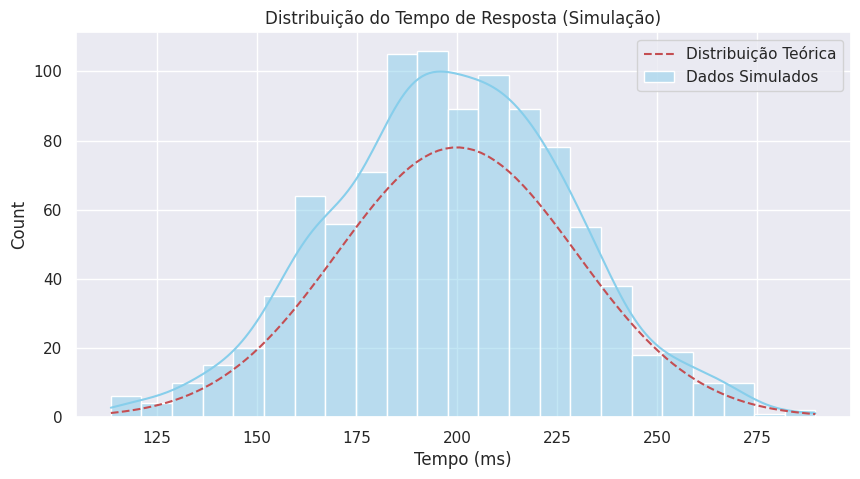

Estudo de Probabilidade (Violação de SLA):


,Métrica,Valor Limite,Média Ref,Desvio Ref,Probabilidade (> Limite)
0,Valor Real (X),250,200,30,4.7790%
1,Z-Score (Z),1.67,0,1,4.7790%


In [ ]:
# --- PARTE 1 B ---

from IPython.display import display # Importa a função display diretamente

# Parâmetros do Experimento (Tempo de resposta da API)
mu = 200    # Média (ms)
sigma = 30  # Desvio Padrão (ms)
n_samples = 1000

# 1. Gerar dados artificiais e plotar
dados_artificiais = np.random.normal(mu, sigma, n_samples)

plt.figure(figsize=(10, 5))
sns.histplot(dados_artificiais, kde=True, color='skyblue', label='Dados Simulados')
# Plotar a curva teórica ideal
x_range = np.linspace(min(dados_artificiais), max(dados_artificiais), 100)
plt.plot(x_range, norm.pdf(x_range, mu, sigma) * n_samples * (max(dados_artificiais)-min(dados_artificiais))/30, 'r--', label='Distribuição Teórica') # Ajuste de escala simples para visualização
plt.title('Distribuição do Tempo de Resposta (Simulação)')
plt.xlabel('Tempo (ms)')
plt.legend()
plt.show()

# 2. Estudos de Probabilidade (Exemplo da Pizza/SLA)
# Pergunta: Qual a probabilidade do tempo ser maior que 250ms (violação de SLA)?
limite_sla = 250

# A) Cálculo Não Padronizado (usando mu e sigma originais)
prob_real = 1 - norm.cdf(limite_sla, loc=mu, scale=sigma)

# B) Cálculo Padronizado (Z-score)
z_score = (limite_sla - mu) / sigma
prob_z = 1 - norm.cdf(z_score, loc=0, scale=1)

# Tabela de Resultados
df_res = pd.DataFrame({
    'Métrica': ['Valor Real (X)', 'Z-Score (Z)'],
    'Valor Limite': [limite_sla, f"{z_score:.2f}"],
    'Média Ref': [mu, 0],
    'Desvio Ref': [sigma, 1],
    'Probabilidade (> Limite)': [f"{prob_real:.4%}", f"{prob_z:.4%}"]
})

print("Estudo de Probabilidade (Violação de SLA):")
display(df_res)

**Parte 1 - C: Distribuição Binomial**

**Contexto:** A distribuição binomial modela o número de sucessos em $n$ tentativas independentes, com probabilidade de sucesso $p$ (ou $s$) constante.

**Equação**:$$P(x) = \binom{n}{x} p^x (1-p)^{n-x}$$

**Experimento:** Simulação para $s=0.80$ (80% de taxa de sucesso), comparando a simulação computacional com o cálculo analítico da equação.

Comparação para X=40 sucessos:
Teórico: 0.1398
Simulado: 0.1372


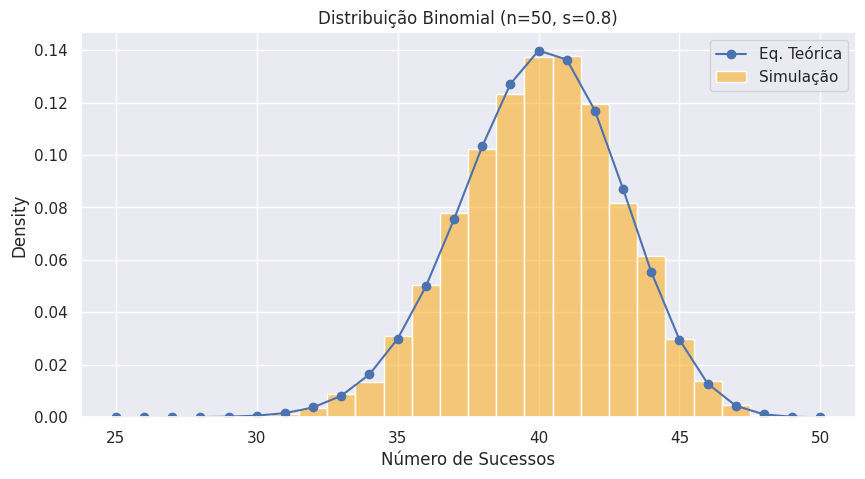

/tmp/ipython-input-3400089455.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Falha (0)', 'Sucesso (1)'], y=contagem, ax=axes[i], palette=['red', 'green'])
/tmp/ipython-input-3400089455.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Falha (0)', 'Sucesso (1)'], y=contagem, ax=axes[i], palette=['red', 'green'])
/tmp/ipython-input-3400089455.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Falha (0)', 'Sucesso (1)'], y=contagem, ax=axes[i], palette=['red', 'green'])
/tmp/ipython-input-3400089455.py:39: FutureWarning: 

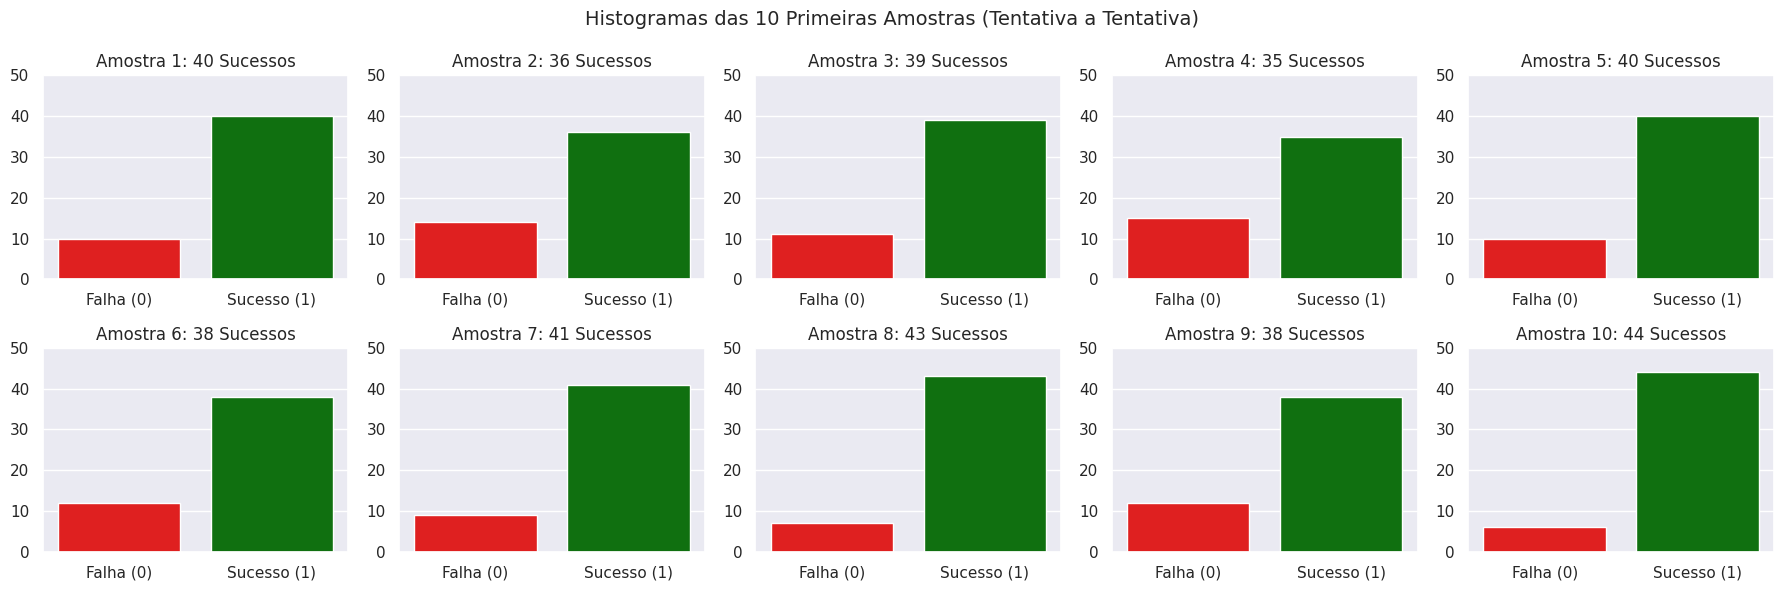

In [ ]:
# --- PARTE 1 C ---

# Parâmetros
p = 0.80  # Probabilidade de sucesso (s) solicitada
n = 50    # Tentativas por experimento
num_simulacoes = 10000

# 1. Simulação
resultados_simulacao = binom.rvs(n, p, size=num_simulacoes)

# 2. Comparação (Exemplo para x = 40 sucessos)
x_alvo = 40
prob_teorica = binom.pmf(x_alvo, n, p)
prob_simulada = np.mean(resultados_simulacao == x_alvo)

print(f"Comparação para X={x_alvo} sucessos:")
print(f"Teórico: {prob_teorica:.4f}")
print(f"Simulado: {prob_simulada:.4f}")

# 3. Histograma Geral
plt.figure(figsize=(10, 5))
sns.histplot(resultados_simulacao, discrete=True, stat="density", color='orange', alpha=0.5, label='Simulação')
x_axis = np.arange(25, n+1)
plt.plot(x_axis, binom.pmf(x_axis, n, p), 'b-o', label='Eq. Teórica')
plt.title(f'Distribuição Binomial (n={n}, s={p})')
plt.xlabel('Número de Sucessos')
plt.legend()
plt.show()

# 4. Visualização das 10 primeiras amostras (Estilo Slide)
amostras_iniciais = binom.rvs(1, p, size=(10, n)) # 10 experimentos de n tentativas (0 ou 1)

fig, axes = plt.subplots(2, 5, figsize=(18, 6))
axes = axes.flatten()
fig.suptitle('Histogramas das 10 Primeiras Amostras (Tentativa a Tentativa)', fontsize=14)

for i in range(10):
    contagem = np.bincount(amostras_iniciais[i], minlength=2)
    sns.barplot(x=['Falha (0)', 'Sucesso (1)'], y=contagem, ax=axes[i], palette=['red', 'green'])
    axes[i].set_title(f'Amostra {i+1}: {contagem[1]} Sucessos')
    axes[i].set_ylim(0, n)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

**Parte 2 - A: Sample Distribution e Sampling Distribution**

**Conceitos:**

**Sample Distribution (Distribuição da Amostra):** A distribuição dos dados observados em uma única coleta. Tende a refletir a forma da população, mas com ruído.

**Sampling Distribution (Distribuição Amostral)**: A distribuição teórica das médias de infinitas amostras. Pelo TLC, tende a ser uma Normal, com desvio padrão menor (Erro Padrão).$$SE = \frac{\sigma}{\sqrt{n}}$$

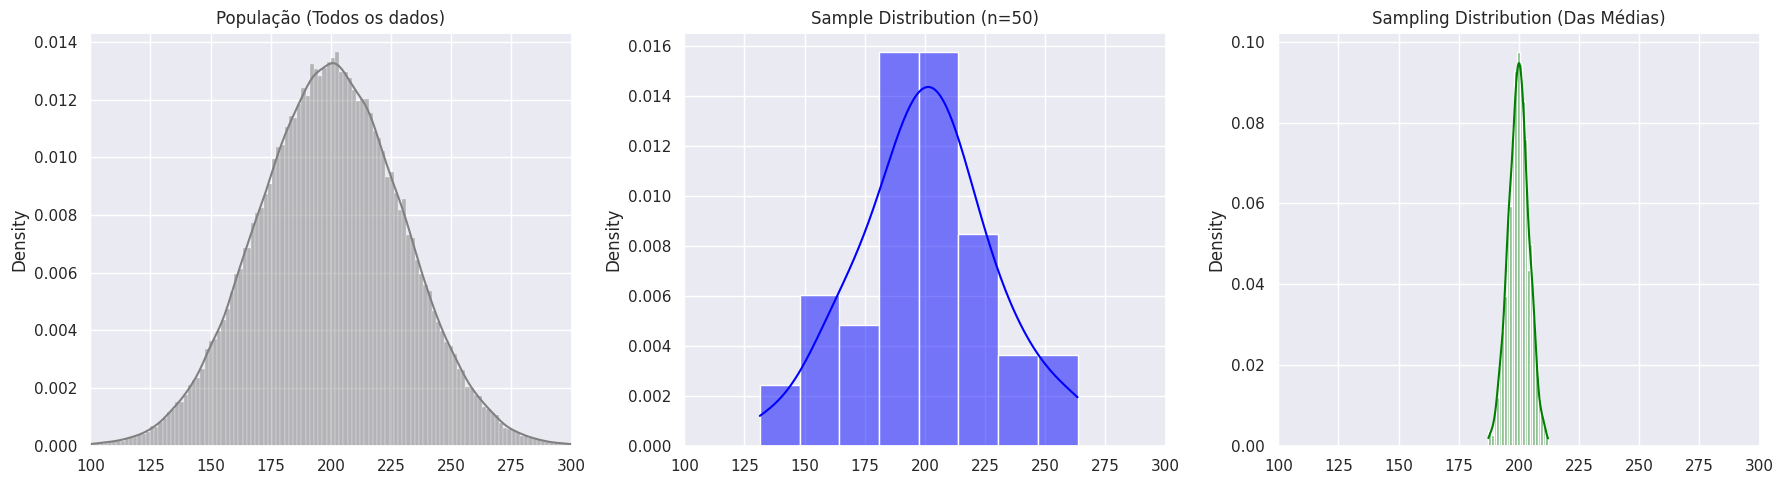

Desvio Padrão da Amostra Única: 27.80
Erro Padrão das Médias (Simulado): 4.25
Erro Padrão Teórico (Sigma/sqrt(n)): 4.24


In [ ]:
# --- PARTE 2 A ---

# População Artificial (Baseada na Parte 1B: Média 200, Sigma 30)
populacao = np.random.normal(mu, sigma, 100000)

# Parâmetros
n_tamanho = 50

# 1. Sample Distribution (UMA amostra)
uma_amostra = np.random.choice(populacao, size=n_tamanho)

# 2. Sampling Distribution (Muitas médias)
medias_amostrais = [np.mean(np.random.choice(populacao, n_tamanho)) for _ in range(1000)]

# Plotagem
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# População
sns.histplot(populacao, kde=True, ax=ax[0], color='gray', stat='density')
ax[0].set_title('População (Todos os dados)')
ax[0].set_xlim(100, 300)

# Sample Dist
sns.histplot(uma_amostra, kde=True, ax=ax[1], color='blue', stat='density')
ax[1].set_title(f'Sample Distribution (n={n_tamanho})')
ax[1].set_xlim(100, 300)

# Sampling Dist
sns.histplot(medias_amostrais, kde=True, ax=ax[2], color='green', stat='density')
ax[2].set_title('Sampling Distribution (Das Médias)')
ax[2].set_xlim(100, 300)

plt.tight_layout()
plt.show()

print(f"Desvio Padrão da Amostra Única: {np.std(uma_amostra):.2f}")
print(f"Erro Padrão das Médias (Simulado): {np.std(medias_amostrais):.2f}")
print(f"Erro Padrão Teórico (Sigma/sqrt(n)): {sigma/np.sqrt(n_tamanho):.2f}")

**Parte 2 - B: Teorema do Limite Central (TLC)**

**Aplicação:** Demonstração do TLC aplicado a uma distribuição Gama (que é assimétrica).

Conforme aumentamos o tamanho da amostra ($n$), a distribuição das médias converge para uma Gaussiana, independentemente da forma original.

Tamanhos de amostra avaliados: 10, 30, 50, 500.

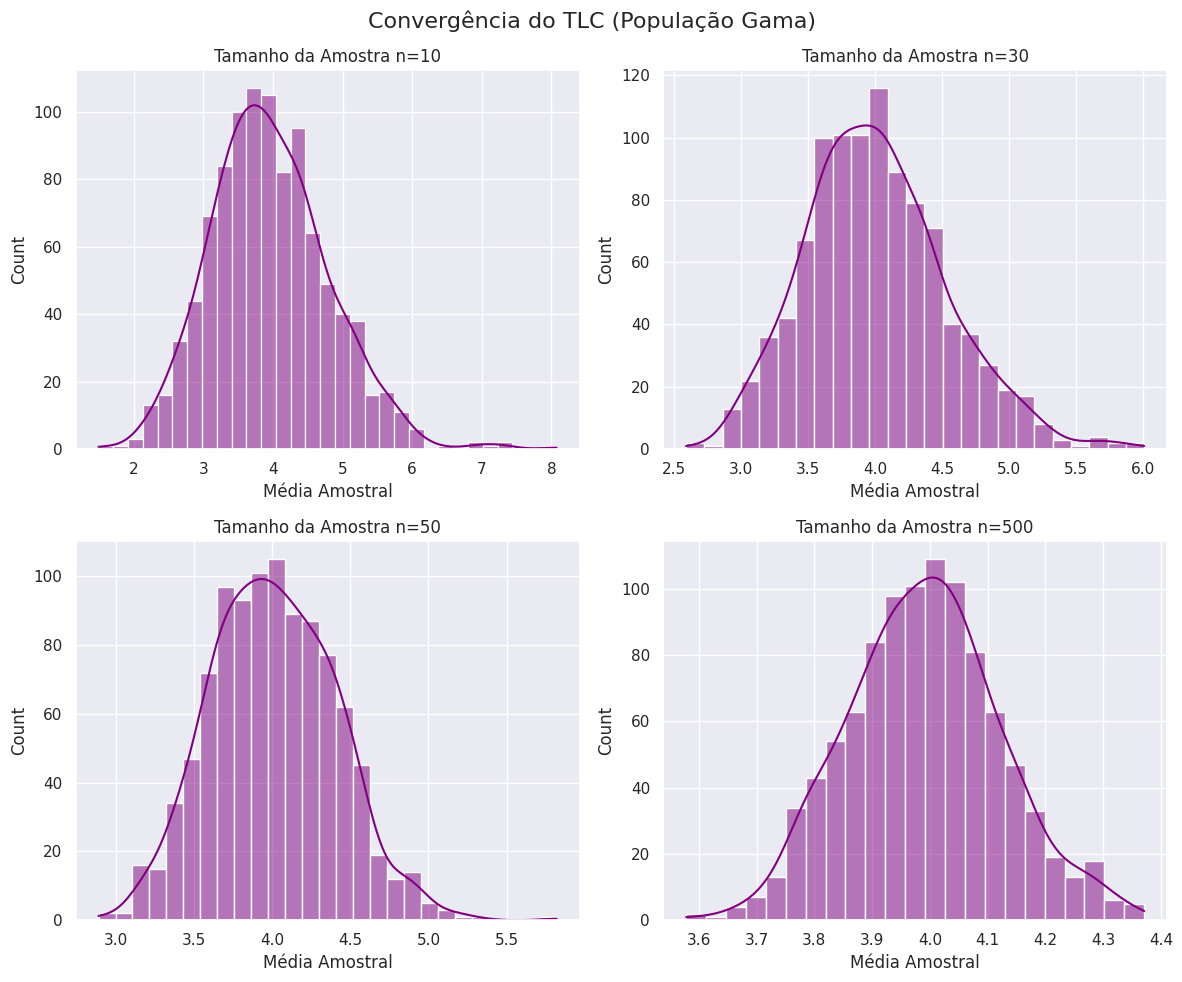

In [ ]:
# --- PARTE 2 B ---

# População Gama (Assimétrica)
shape, scale = 2.0, 2.0
dados_gama = np.random.gamma(shape, scale, 100000)

tamanhos = [10, 30, 50, 500]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
fig.suptitle('Convergência do TLC (População Gama)', fontsize=16)

for i, n in enumerate(tamanhos):
    # Gerar 1000 médias para este tamanho de amostra n
    medias = [np.mean(np.random.choice(dados_gama, n)) for _ in range(1000)]

    sns.histplot(medias, kde=True, ax=axes[i], color='purple')
    axes[i].set_title(f'Tamanho da Amostra n={n}')
    axes[i].set_xlabel('Média Amostral')

plt.tight_layout()
plt.show()

**Parte 2 - C: Cálculo do P-value (Passo a Passo)**

**Definição:** O p-value é a probabilidade de obter um resultado de teste pelo menos tão extremo quanto o que foi realmente observado, assumindo que a hipótese nula é verdadeira.

**Passos do Programa:**

Definir a Hipótese Nula ($H_0$).

Posicionar o valor observado.

Calcular a área sob a curva (integral) da cauda.

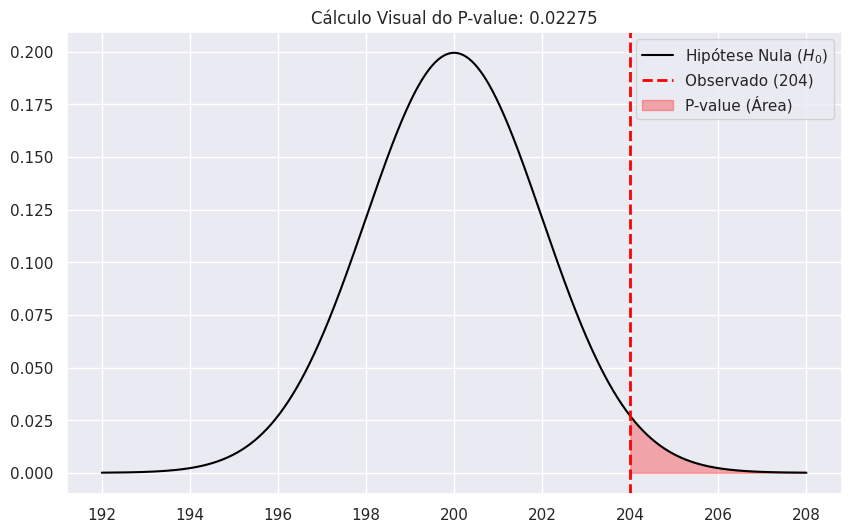

Resultado: O p-valor é 0.02275. Se < 0.05, rejeitamos H0.


In [ ]:
# --- PARTE 2 C ---

def demonstrar_p_value(media_h0, std_erro, valor_observado):
    # 1. Criar a distribuição H0
    x = np.linspace(media_h0 - 4*std_erro, media_h0 + 4*std_erro, 1000)
    y = norm.pdf(x, media_h0, std_erro)

    plt.figure(figsize=(10, 6))

    # Plot H0
    plt.plot(x, y, label='Hipótese Nula ($H_0$)', color='black')

    # Plot Valor Observado
    plt.axvline(valor_observado, color='red', linestyle='--', linewidth=2, label=f'Observado ({valor_observado})')

    # Preencher Área (P-value unilateral à direita)
    x_fill = np.linspace(valor_observado, x.max(), 100)
    y_fill = norm.pdf(x_fill, media_h0, std_erro)
    plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='P-value (Área)')

    # Cálculo numérico
    p_val = 1 - norm.cdf(valor_observado, media_h0, std_erro)

    plt.title(f'Cálculo Visual do P-value: {p_val:.5f}')
    plt.legend()
    plt.show()

    return p_val

# Executar exemplo
# H0: Média = 200, Erro Padrão = 2. Observado = 204
p_calculado = demonstrar_p_value(media_h0=200, std_erro=2, valor_observado=204)
print(f"Resultado: O p-valor é {p_calculado:.5f}. Se < 0.05, rejeitamos H0.")

**Parte 2 - D: Taxa de Falsos Negativos**

**Simulação Red vs Blue:**

**Vermelha ($H_0$):** Distribuição Nula.

**Azul ($H_1$):**
 Distribuição Verdadeira (Realidade).

 Vamos sortear amostras da  **Azul**  (verdade), mas testar contra a **Vermelha**.Se o p-value for $> 0.05$, falhamos em rejeitar $H_0$ (que é falsa), **cometendo um Erro Tipo II (Falso Negativo)**.

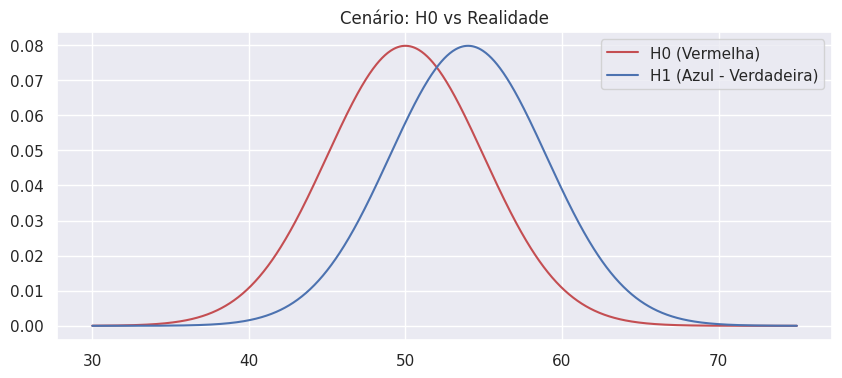

Iniciando 100 simulações de teste...
------------------------------
Total de testes: 100
Falsos Negativos detectados: 75
Taxa de Falso Negativo: 75%
------------------------------
Interpretação: Em X% das vezes, os dados da distribuição azul pareciam pertencer à vermelha devido ao acaso e tamanho pequeno da amostra.


In [ ]:
# --- PARTE 2 D ---

# Configuração das Distribuições
media_vermelha = 50   # H0
media_azul = 54       # H1 (Realidade - Deslocada)
std_comum = 5

# Plotagem das Distribuições
x = np.linspace(30, 75, 1000)
plt.figure(figsize=(10, 4))
plt.plot(x, norm.pdf(x, media_vermelha, std_comum), 'r-', label='H0 (Vermelha)')
plt.plot(x, norm.pdf(x, media_azul, std_comum), 'b-', label='H1 (Azul - Verdadeira)')
plt.legend()
plt.title('Cenário: H0 vs Realidade')
plt.show()

# Simulação
n_sequencias = 100
n_amostra = 3  # Amostra pequena aumenta o erro
falsos_negativos = 0
alpha = 0.05

print("Iniciando 100 simulações de teste...")

for i in range(n_sequencias):
    # 1. Sorteia da AZUL
    amostra = norm.rvs(loc=media_azul, scale=std_comum, size=n_amostra)

    # 2. Calcula p-value contra a VERMELHA (Teste T para uma amostra)
    # H0: media = 50. Alternative: media > 50
    stat, p_val = ttest_1samp(amostra, popmean=media_vermelha, alternative='greater')

    # 3. Verifica Falso Negativo
    # Se p_val > 0.05, não rejeitamos H0 (erro, pois a amostra veio da azul)
    if p_val > alpha:
        falsos_negativos += 1

print("-" * 30)
print(f"Total de testes: {n_sequencias}")
print(f"Falsos Negativos detectados: {falsos_negativos}")
print(f"Taxa de Falso Negativo: {falsos_negativos}%")
print("-" * 30)
print("Interpretação: Em X% das vezes, os dados da distribuição azul pareciam pertencer à vermelha devido ao acaso e tamanho pequeno da amostra.")